In [29]:
# importing Libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_PL = df[df['job_country'] == 'Poland']

In [7]:
df_skills = df_PL.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name= ' skill_count')

df_skills_count.sort_values(by=' skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
912,python,Data Engineer,2240
1160,sql,Data Engineer,2231
1159,sql,Data Analyst,1572
93,azure,Data Engineer,1453
83,aws,Data Engineer,1251
...,...,...,...
226,css,Senior Data Scientist,1
228,dart,Data Scientist,1
239,datarobot,Data Engineer,1
255,db2,Machine Learning Engineer,1


In [8]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

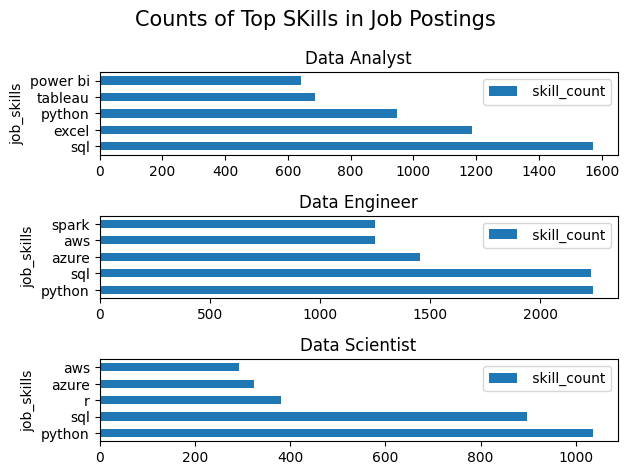

In [15]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y=' skill_count', ax=ax[i], title=job_title)

fig.suptitle('Counts of Top SKills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()


In [19]:
df_job_title_count = df_PL['job_title_short'].value_counts().reset_index(name='jobs_total')

In [32]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on='job_title_short')
df_skills_perc['skill_percent'] = 100 * df_skills_perc[' skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Engineer,2240,3540,63.276836
1,sql,Data Engineer,2231,3540,63.022599
2,sql,Data Analyst,1572,3172,49.558638
3,azure,Data Engineer,1453,3540,41.045198
4,aws,Data Engineer,1251,3540,35.338983
...,...,...,...,...,...
1399,css,Senior Data Scientist,1,531,0.188324
1400,dart,Data Scientist,1,1713,0.058377
1401,datarobot,Data Engineer,1,3540,0.028249
1402,db2,Machine Learning Engineer,1,468,0.213675


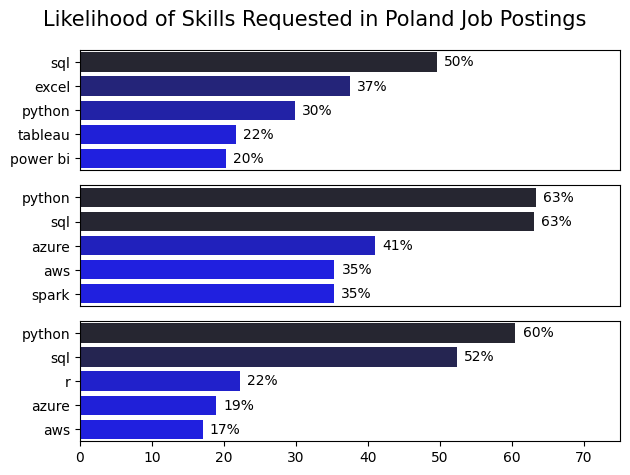

In [48]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data = df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue = 'skill_percent', palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 75)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in Poland Job Postings', fontsize=15)
fig.tight_layout()
plt.show()